# 4.4 Overfiting and underfitting

Importing all the stuff

In [0]:
import keras
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Loading the data

In [0]:
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(num_words=10000)

Looking at the data

In [0]:
train_data.shape

(25000,)

In [0]:
test_data.shape

(25000,)

In [0]:
train_targets

array([1, 0, 0, ..., 0, 1, 0])

Preparing the data

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_targets).astype('float32')
y_test = np.asarray(test_targets).astype('float32')

Original network used for classification

In [0]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Smaller model

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

Comparision

In [0]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))




Train on 25000 samples, validate on 25000 samples
Epoch 1/20





25000/25000 [==============================] - 4s 150us/step - loss: 0.4430 - acc: 0.8242 - val_loss: 0.3312 - val_acc: 0.8811
Epoch 2/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2544 - acc: 0.9111 - val_loss: 0.2851 - val_acc: 0.8883
Epoch 3/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.1989 - acc: 0.9283 - val_loss: 0.2852 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 3s 116us/step - loss: 0.1664 - acc: 0.9414 - val_loss: 0.2938 - val_acc: 0.8841
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.1447 - acc: 0.9492 - val_loss: 0.3219 - val_acc: 0.8761
Epoch 6/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.1279 - acc: 0.9554 - val_loss: 0.3662 - val_acc: 0.8658
Epoch 7/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.1131 - acc: 0.9619 - val_loss: 0

In [0]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.6226 - acc: 0.6526 - val_loss: 0.5754 - val_acc: 0.7097
Epoch 2/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.5283 - acc: 0.8072 - val_loss: 0.5128 - val_acc: 0.8222
Epoch 3/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.4686 - acc: 0.8649 - val_loss: 0.4759 - val_acc: 0.8296
Epoch 4/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.4240 - acc: 0.8944 - val_loss: 0.4432 - val_acc: 0.8707
Epoch 5/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.3875 - acc: 0.9174 - val_loss: 0.4294 - val_acc: 0.8594
Epoch 6/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.3556 - acc: 0.9306 - val_loss: 0.4109 - val_acc: 0.8719
Epoch 7/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.3266 - acc: 0.9408 - val_loss: 0.3967 - 

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

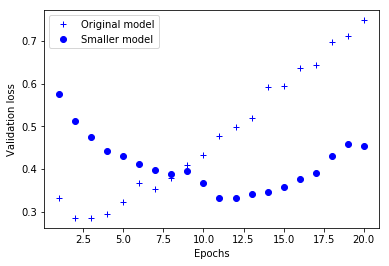

In [0]:
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Bigger network

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [0]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 14s 554us/step - loss: 0.4653 - acc: 0.7998 - val_loss: 0.2820 - val_acc: 0.8873
Epoch 2/20
25000/25000 [==============================] - 13s 534us/step - loss: 0.2213 - acc: 0.9127 - val_loss: 0.4324 - val_acc: 0.8178
Epoch 3/20
25000/25000 [==============================] - 13s 535us/step - loss: 0.1299 - acc: 0.9518 - val_loss: 0.3336 - val_acc: 0.8844
Epoch 4/20
25000/25000 [==============================] - 14s 541us/step - loss: 0.0633 - acc: 0.9802 - val_loss: 0.4211 - val_acc: 0.8816
Epoch 5/20
25000/25000 [==============================] - 13s 534us/step - loss: 0.0617 - acc: 0.9884 - val_loss: 0.5079 - val_acc: 0.8802
Epoch 6/20
25000/25000 [==============================] - 13s 532us/step - loss: 0.0926 - acc: 0.9887 - val_loss: 0.6030 - val_acc: 0.8642
Epoch 7/20
25000/25000 [==============================] - 13s 539us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.

Comparision

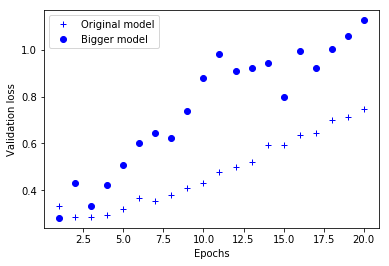

In [0]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

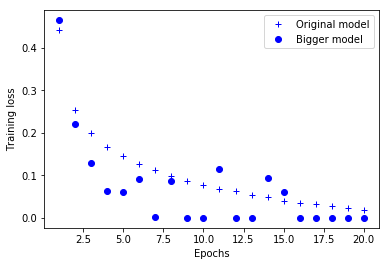

In [0]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

### Adding weight regularization

In [0]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [0]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.5151 - acc: 0.8144 - val_loss: 0.3904 - val_acc: 0.8742
Epoch 2/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.3193 - acc: 0.9039 - val_loss: 0.3536 - val_acc: 0.8761
Epoch 3/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.2723 - acc: 0.9196 - val_loss: 0.3252 - val_acc: 0.8887
Epoch 4/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.2476 - acc: 0.9304 - val_loss: 0.3280 - val_acc: 0.8868
Epoch 5/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.2331 - acc: 0.9344 - val_loss: 0.3340 - val_acc: 0.8844
Epoch 6/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.2253 - acc: 0.9388 - val_loss: 0.3465 - val_acc: 0.8801
Epoch 7/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.2157 - acc: 0.9404 - val_loss: 0.3659 - 

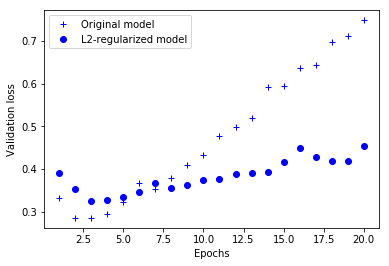

In [0]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### Adding dropout

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.6036 - acc: 0.6714 - val_loss: 0.4624 - val_acc: 0.8551
Epoch 2/20
25000/25000 [==============================] - 3s 125us/step - loss: 0.4471 - acc: 0.8116 - val_loss: 0.3433 - val_acc: 0.8794
Epoch 3/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.3557 - acc: 0.8617 - val_loss: 0.2966 - val_acc: 0.8867
Epoch 4/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.3005 - acc: 0.8861 - val_loss: 0.2802 - val_acc: 0.8864
Epoch 5/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.2601 - acc: 0.9035 - val_loss: 0.2806 - val_acc: 0.8902
Epoch 6/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.2336 - acc: 0.9134 - val_loss: 0.3053 - val_acc: 0.8852
Epoch 7/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.2079 - acc: 0.9247 - val_loss: 0.3070 - 

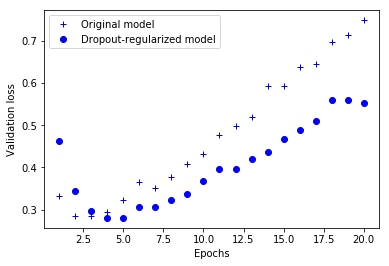

In [0]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()